# The Perceptron: A Fundamental Building Block of Neural Networks

## Introduction

The perceptron is the simplest form of a feedforward neural network. Invented by Frank Rosenblatt in 1958, it forms the foundation for modern deep learning. A perceptron is a binary classifier that makes predictions based on a linear combination of input features followed by a step activation function.

## Mathematical Foundation

### The Perceptron Model

The perceptron computes a weighted sum of inputs and applies a step function:

1. **Linear Combination**:
   $z = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n$
   where:

   - $w_0$ is the bias term
   - $w_i$ are the weights
   - $x_i$ are the input features

2. **Step Function**:
   $$
   f(z) = \begin{cases}
   1 & \text{if } z > 0 \\
   0 & \text{if } z \leq 0
   \end{cases}
   $$

### Learning Algorithm

The perceptron learns through an iterative process:

1. Initialize weights randomly
2. For each training example:
   - Calculate prediction: $\hat{y} = f(z)$
   - Update weights if prediction is wrong:
     $w_i = w_i + \alpha(y - \hat{y})x_i$
     where $\alpha$ is the learning rate

### Geometric Interpretation

The perceptron learns a hyperplane (a line in 2D) that separates two classes. The equation of this decision boundary is:
$w_0 + w_1x_1 + w_2x_2 = 0$

This line divides the input space into two regions, one for each class.

## Implementation Overview

In this notebook, we will:

1. Generate synthetic binary classification data
2. Implement the perceptron algorithm from scratch
3. Visualize the decision boundary
4. Understand how the perceptron learns to separate classes


In [1]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

# Setup and Data Preparation

To implement our perceptron, we first need to import the necessary libraries:

- `sklearn.datasets`: Provides utilities for generating synthetic datasets
- `numpy`: Enables efficient numerical computations and array operations
- `matplotlib.pyplot`: Allows us to create visualizations

The code below imports these essential libraries that we'll use throughout the implementation.


In [2]:
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=1,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=41,
    hypercube=False,
    class_sep=10,
)

# Creating Synthetic Dataset

To demonstrate the perceptron algorithm, we'll create a synthetic binary classification dataset. We use `make_classification` with these parameters:

- `n_samples=100`: Creates 100 data points for training
- `n_features=2`: Each point has 2 features (for 2D visualization)
- `n_classes=2`: Binary classification problem
- `class_sep=10`: High separation between classes for clear visualization
- `random_state=41`: Ensures reproducibility

This will generate linearly separable data, which is necessary since the perceptron can only learn linearly separable patterns.


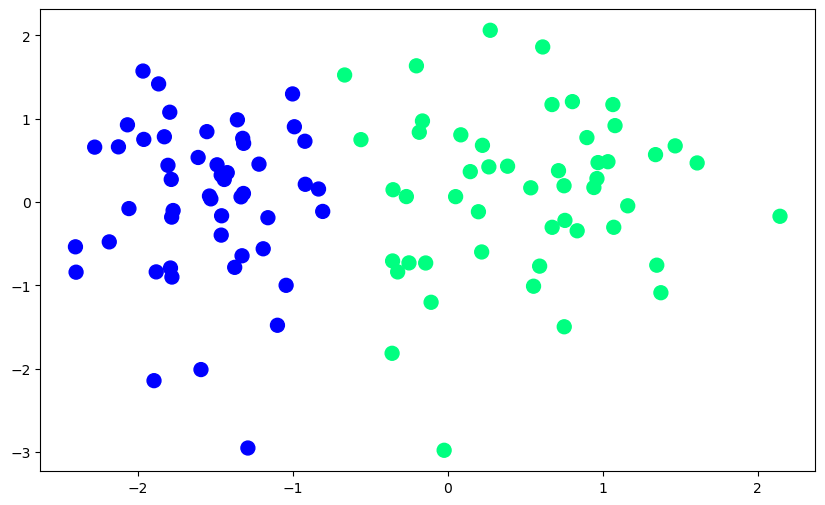

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="winter", s=100)

plt.show()

# Data Visualization

Let's visualize our generated dataset to understand its structure:

- Blue and yellow points represent the two different classes
- X-axis and Y-axis represent our two features
- The clear separation between classes shows that the data is linearly separable
- Each point's coordinates correspond to its feature values

This visualization helps us confirm that our data is indeed suitable for the perceptron algorithm, as we can see a clear linear boundary could separate the classes.


In [4]:
def step(z):
    return 1 if z > 0 else 0

# Step Function: The Activation Function

The step function is the activation function used in the perceptron. It transforms the weighted sum of inputs into a binary output:

$$
f(z) = \begin{cases}
1 & \text{if } z > 0 \\
0 & \text{if } z \leq 0
\end{cases}
$$

Where:

- $z$ is the weighted sum of inputs ($w_0 + w_1x_1 + w_2x_2$)
- Output is binary: 1 for positive class, 0 for negative class

This binary output makes the perceptron suitable for binary classification tasks. Modern neural networks typically use smoother activation functions like ReLU or sigmoid, but the step function was historically the first activation function used.


In [5]:
def perceptron(X, y):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0, 100)
        y_hat = step(np.dot(X[j], weights))
        weights = weights + lr * (y[j] - y_hat) * X[j]

    return weights[0], weights[1:]

# Perceptron Learning Algorithm Implementation

The perceptron learning algorithm is an iterative process that adjusts weights to find a separating hyperplane. Here's how it works:

1. **Input Preparation**:

   - Add bias term: $X' = [1, X]$ (adds column of 1s for bias)
   - Initialize weights: $w = [w_0, w_1, w_2]$ (includes bias weight)

2. **Training Loop** (1000 iterations):
   - Randomly select a training example $(x_i, y_i)$
   - Compute prediction: $\hat{y} = f(w^T x_i)$
   - Update weights: $w = w + \alpha(y_i - \hat{y})x_i$

Key Components:

- Learning rate $\alpha = 0.1$: Controls size of weight updates
- Error term $(y_i - \hat{y})$: Difference between true and predicted labels
- Weight update only occurs when prediction is wrong
- Random sample selection helps prevent cycling in non-separable cases

The algorithm continues until maximum iterations are reached or convergence (no misclassifications).


In [6]:
intercept_, coef_ = perceptron(X, y)

# Training the Perceptron

Now we'll train our perceptron on the synthetic data. The function returns:

- `intercept_` ($w_0$): The bias term that shifts the decision boundary
- `coef_` ($[w_1, w_2]$): The weights for our two features

These parameters define the decision boundary that separates our two classes. After training, we can use these parameters to make predictions on new data points.


In [7]:
print(coef_)
print(intercept_)

[1.41748534 0.08182958]
0.9


In [8]:
m = -(coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])

# Computing the Decision Boundary

The perceptron's decision boundary is a line that separates the two classes. Its equation is:

$w_1x_1 + w_2x_2 + w_0 = 0$

To visualize this line, we convert it to slope-intercept form $(y = mx + b)$:
$x_2 = -\frac{w_1}{w_2}x_1 - \frac{w_0}{w_2}$

Where:

- Slope $m = -\frac{w_1}{w_2}$
- Y-intercept $b = -\frac{w_0}{w_2}$

Points above this line are classified as one class, points below as the other class.
The weights we learned determine both the slope and position of this boundary.


In [9]:
x_input = np.linspace(-3, 3, 100)
y_input = m * x_input + b

# Plotting the Decision Boundary

To visualize how well our perceptron has learned to separate the classes:

1. Generate x-coordinates spanning our data range [-3, 3]
2. Calculate corresponding y-coordinates using $y = mx + b$
3. Plot this line along with our data points

The red line represents the decision boundary. Points on one side are classified as class 0, and points on the other side as class 1. A good decision boundary should clearly separate the two classes with minimal misclassifications.


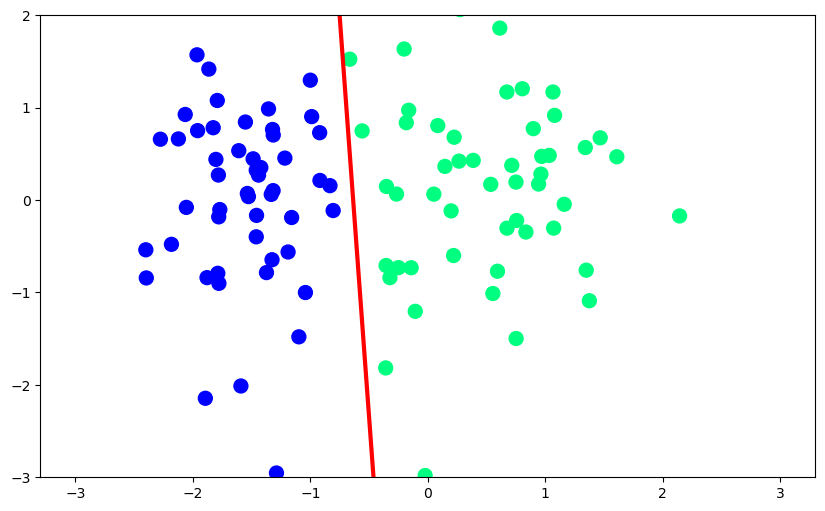

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color="red", linewidth=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="winter", s=100)
plt.ylim(-3, 2)

plt.show()